# Ex 1

In [17]:
library('clue')
library('factoextra')

In [1]:
sample.int(min=1, max=100, 10)

ERROR: Error in sample.int(min = 1, max = 100, 10): unused arguments (min = 1, max = 100)


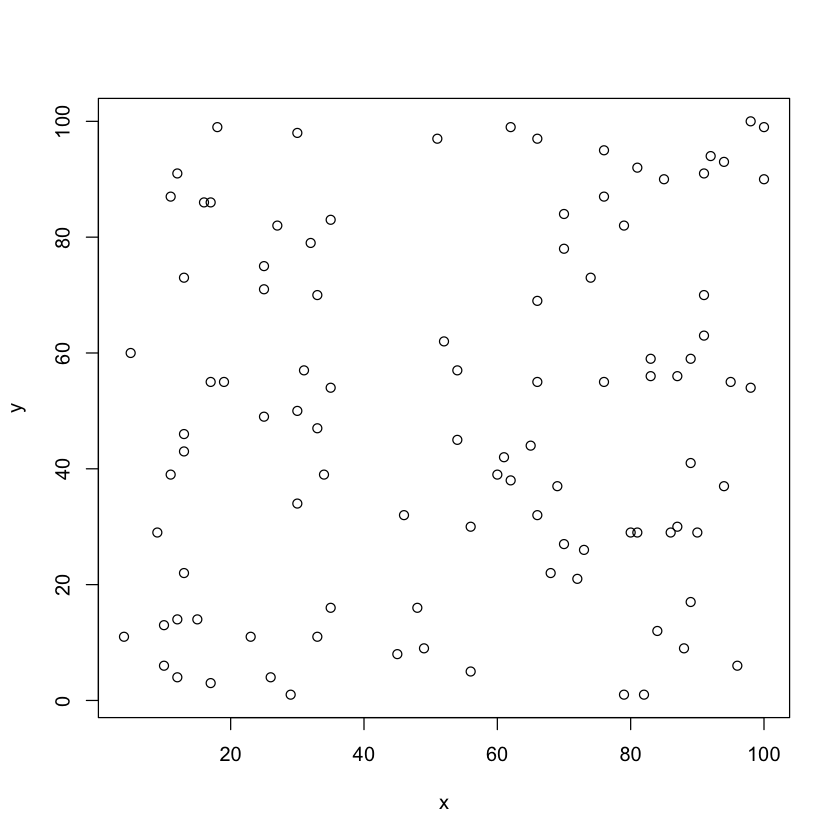

In [3]:
x = sample.int(100, 100, replace=TRUE)
y = sample.int(100, 100, replace=TRUE)
plot(x=x, y=y)

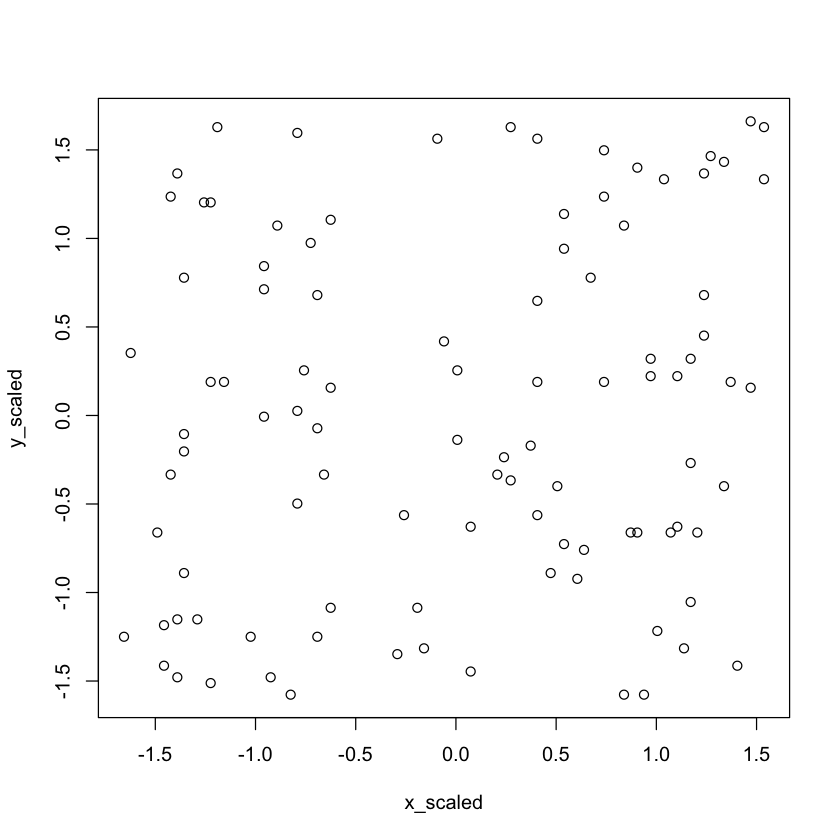

In [4]:
x_scaled = (x-mean(x))/sd(x)
y_scaled = (y-mean(y))/sd(y)
plot(x=x_scaled, y=y_scaled)

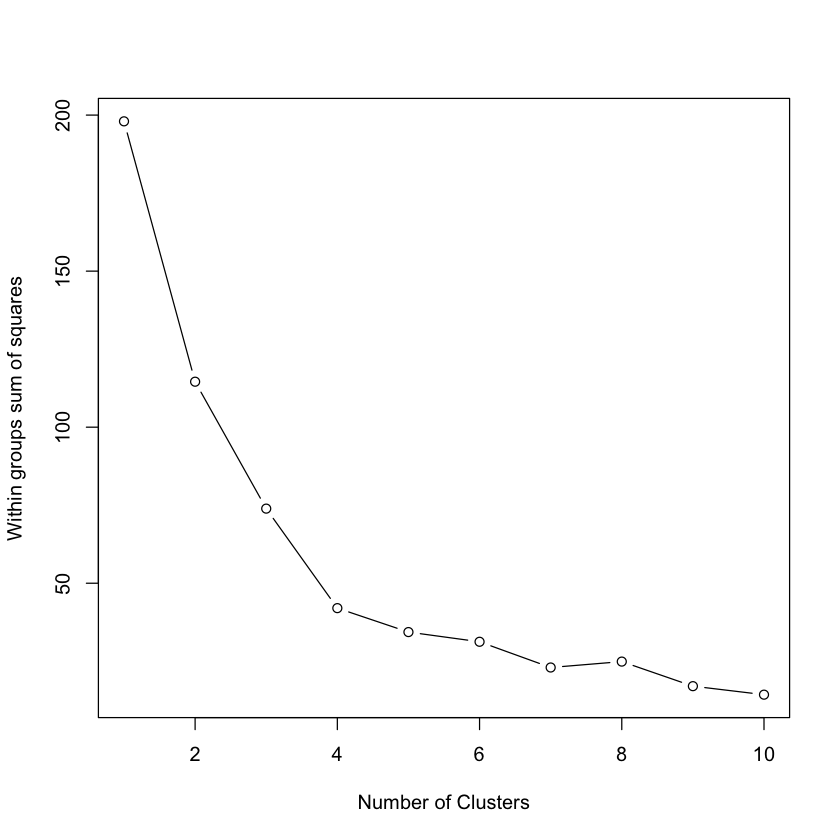

In [5]:
df = data.frame(x = x_scaled, y = y_scaled)
wss = (nrow(df) - 1)*sum(apply(df, 2, var))

for (i in 1:10) {
    wss[i] = sum(kmeans(df, centers = i)$withinss)
}

plot(1:10, wss, type = 'b',
     xlab = 'Number of Clusters',
     ylab = "Within groups sum of squares")

Nhận xét: k tốt nhất là 4

In [10]:
set.seed(42)
cluster_model = kmeans(df, centers = 4)
cluster_model

K-means clustering with 4 clusters of sizes 25, 26, 27, 22

Cluster means:
           x          y
1 -0.9124276  0.7049371
2  0.7144820 -0.7567222
3  0.9691732  0.9284428
4 -0.9969782 -1.0462093

Clustering vector:
  [1] 4 2 3 1 1 1 3 3 2 1 3 3 4 3 3 3 2 4 2 2 1 2 3 4 1 1 3 3 1 1 4 2 1 4 3 1 4
 [38] 1 2 3 3 3 3 4 2 4 4 4 4 3 2 1 4 4 4 2 1 4 3 2 1 4 4 1 3 3 4 2 4 2 4 1 2 3
 [75] 2 2 3 3 2 4 1 3 2 2 1 2 2 1 1 2 1 2 1 1 1 2 3 3 3 2

Within cluster sum of squares by cluster:
[1] 12.107637  9.394075 11.944025  8.574205
 (between_SS / total_SS =  78.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [20]:
x_new = c(80, 50, 70)
y_new = c(30, 45, 75)
x_new_scaled = (x_new-mean(x))/sd(x)
y_new_scaled = (y_new-mean(y))/sd(y)
df_new = data.frame(x = x_new_scaled, y = y_new_scaled)
new_result = cl_predict(cluster_model, newdata=df_new)
new_result

Class ids:
[1] 2 2 3

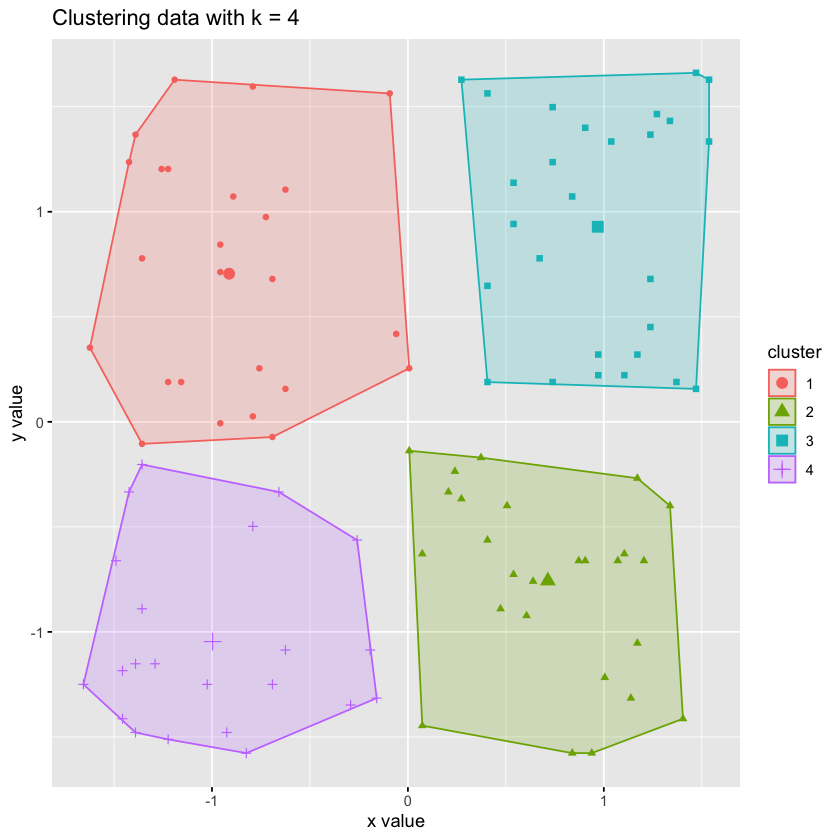

In [49]:
fviz_cluster(cluster_model, geom = "point", data = df) + ggtitle("Clustering data with k = 4")

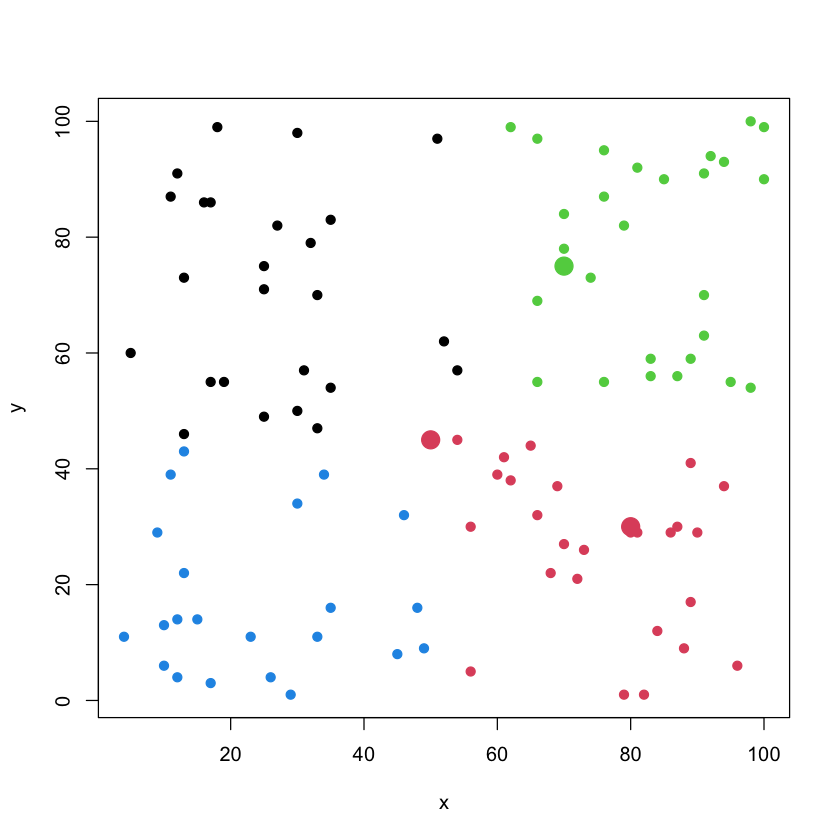

In [56]:
factor_label = as.factor(cluster_model$cluster)
factor_new_result = factor(new_result, levels=c(1,2,3,4))
plot(x = x, y = y, col = factor_label, pch=19)
lines(x_new, y_new, col = factor_new_result, type = 'p', pch=19, cex = 2)

# Ex 2

In [64]:
df = read.csv('../Du_lieu/shopping_data.csv')
df = df[, c(4,5)]
head(df)

,Annual.Income..k..,Spending.Score..1.100.
,<int>,<int>
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
6,17,76


In [65]:
colnames(df) = c('Annual_Income', 'Spending')

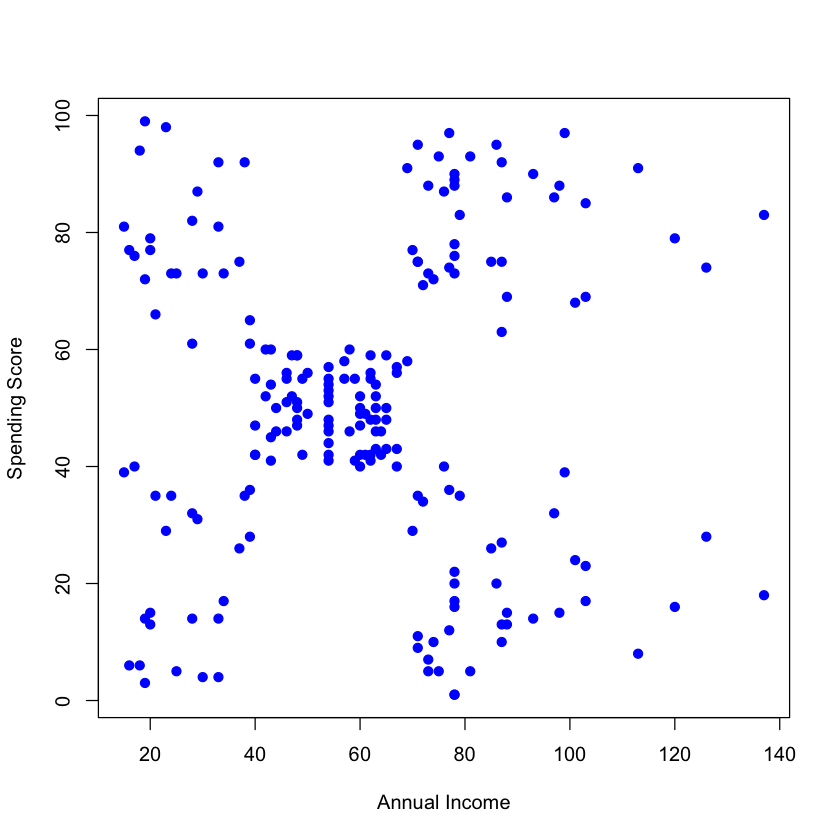

In [68]:
plot(x=df$Annual_Income, y=df$Spending,
    xlab='Annual Income', ylab='Spending Score', col='blue', pch=19)

In [69]:
x = df$Annual_Income
y = df$Spending
df_scaled = data.frame(Annual_Income = (x-mean(x))/sd(x),
                       Spending = (y-mean(y))/sd(y))

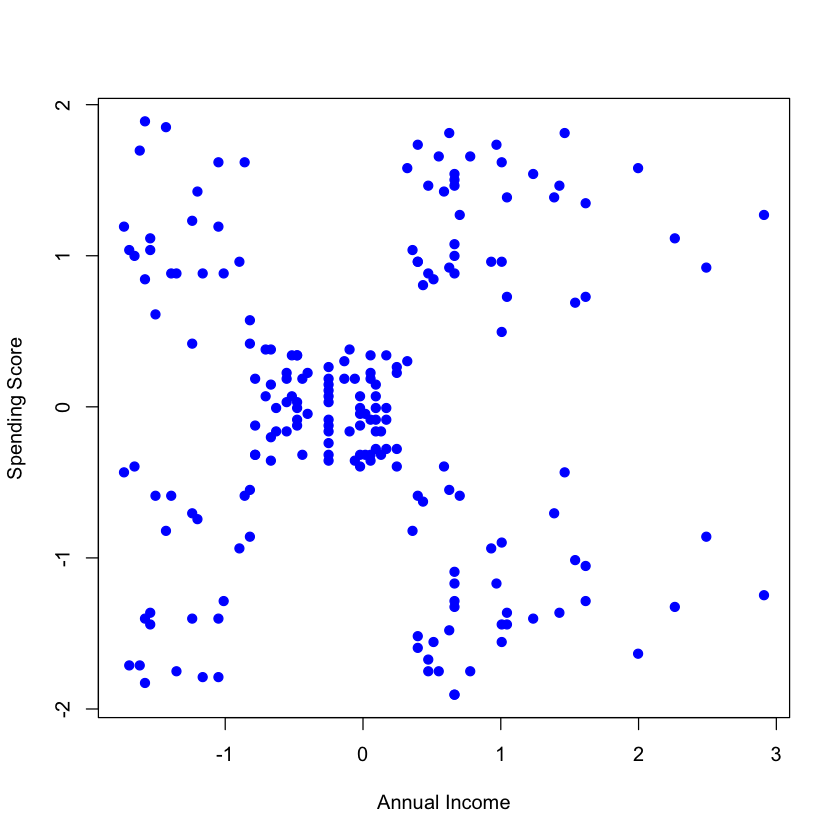

In [70]:
plot(x=df_scaled$Annual_Income, y=df_scaled$Spending,
    xlab='Annual Income', ylab='Spending Score', col='blue', pch=19)

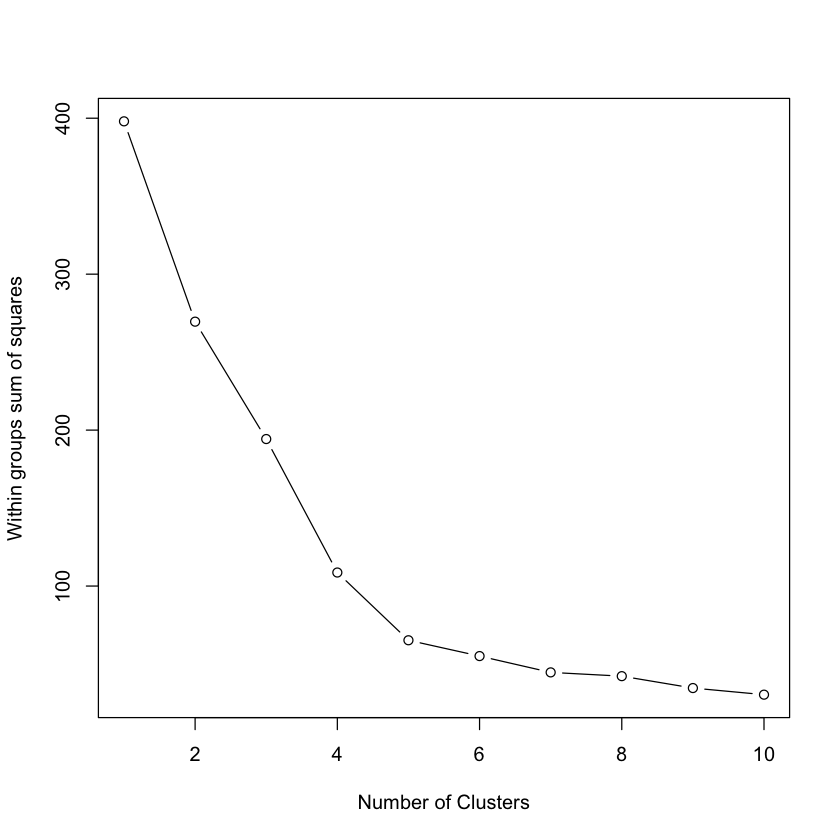

In [71]:
wss = (nrow(df) - 1)*sum(apply(df_scaled, 2, var))

for (i in 1:10) {
    wss[i] = sum(kmeans(df_scaled, centers = i)$withinss)
}

plot(1:10, wss, type = 'b',
     xlab = 'Number of Clusters',
     ylab = "Within groups sum of squares")

Nhận xét: Best k = 5

In [72]:
set.seed(42)
cluster_model = kmeans(df_scaled, centers = 5)
cluster_model

K-means clustering with 5 clusters of sizes 23, 81, 35, 22, 39

Cluster means:
  Annual_Income    Spending
1    -1.3042458 -1.13411939
2    -0.2004097 -0.02638995
3     1.0523622 -1.28122394
4    -1.3262173  1.12934389
5     0.9891010  1.23640011

Clustering vector:
  [1] 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 [38] 4 1 4 1 4 1 2 1 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 5 3 5 2 5 3 5 3 5 2 5 3 5 3 5 3 5 3 5 2 5 3 5 3 5
[149] 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3
[186] 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5

Within cluster sum of squares by cluster:
[1]  7.577407 14.485632 18.304646  5.217630 19.655252
 (between_SS / total_SS =  83.6 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"     

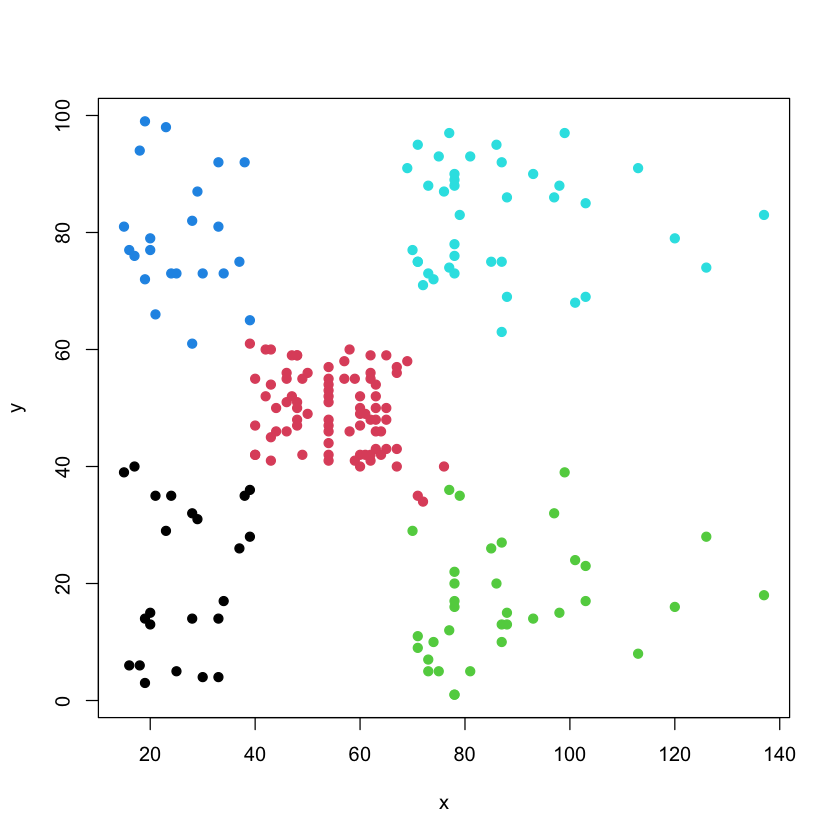

In [73]:
factor_label = as.factor(cluster_model$cluster)
plot(x = x, y = y, col = factor_label, pch=19)

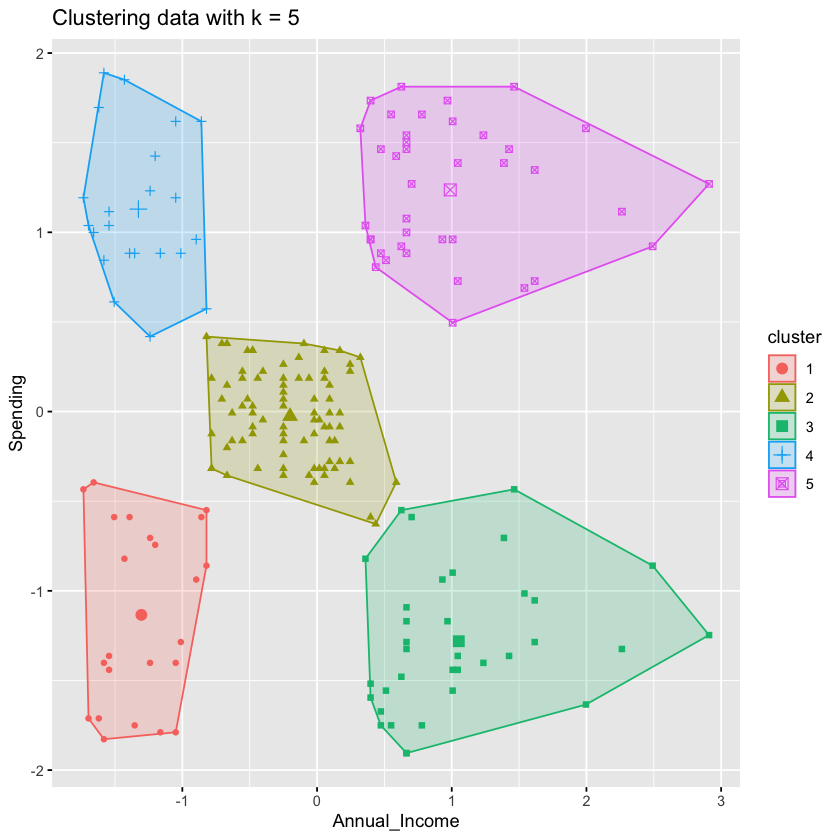

In [76]:
fviz_cluster(cluster_model, geom = "point", data = df) + ggtitle("Clustering data with k = 5")